In [1]:
import tensorflow as tf 
from tensorflow.contrib import rnn

E:\anconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
timestep = 28
num_hidden = 128
num_classes = 10
learn_rate = 0.1
batch_size = 128
train_steps = 4300


def RNN(x_dict,reuse):
    with tf.variable_scope("RNN",reuse=reuse):
        x = x_dict["images"]
        x = tf.reshape(x,shape=[-1,28,28])

        x = tf.unstack(x,num=timestep,axis=1)

        rnn_cell = rnn.BasicLSTMCell(num_hidden,forget_bias=1.0)

        outputs,states = rnn.static_rnn(rnn_cell,x,dtype=tf.float32)

        out = tf.layers.dense(outputs[-1],num_classes)
    
    return out

def model_fn(features,labels,mode):
    logit_train = RNN(features,reuse=False)
    logit_test = RNN(features,reuse=True)
    
    # Predictions
    pred_classes = tf.argmax(logit_test, axis=1)
    pred_probas = tf.nn.softmax(logit_test)
    
    
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode,predictions=pred_classes)
    
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logit_train,
                                                                            labels=tf.cast(labels,dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learn_rate)
    train_op = optimizer.minimize(loss_op,global_step=tf.train.get_global_step())#,global_step=tf.train.get_global_step()
                             
    acc_op = tf.metrics.accuracy(labels=labels,predictions=pred_classes)
    
    estim_spec = tf.estimator.EstimatorSpec(mode,predictions=pred_classes,loss=loss_op,train_op=train_op,eval_metric_ops={"accuracy":acc_op})
    
    return estim_spec


    

In [9]:
model = tf.estimator.Estimator(model_fn,model_dir="./model")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000013C8E199F98>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../Data/mnist",one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../Data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../Data/mnist\train-labels-idx1-ubyte.gz
Extracting ../Data/mnist\t10k-images-idx3-ubyte.gz
Extracting ../Data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


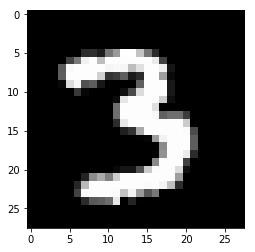

3

In [25]:
i = 500
test_images = mnist.test.images[i]
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.reshape(test_images, [28, 28]), cmap='gray')
plt.show()

mnist.test.labels[i]

In [32]:
input_fn = tf.estimator.inputs.numpy_input_fn(x={"images":mnist.train.images},y=mnist.train.labels,batch_size=batch_size,shuffle=False,num_epochs=None)
model.train(input_fn,steps=train_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./model\model.ckpt.
INFO:tensorflow:loss = 2.3122883, step = 1
INFO:tensorflow:global_step/sec: 22.0342
INFO:tensorflow:loss = 1.6221787, step = 101 (4.540 sec)
INFO:tensorflow:global_step/sec: 25.2989
INFO:tensorflow:loss = 1.1898363, step = 201 (3.953 sec)
INFO:tensorflow:global_step/sec: 25.5378
INFO:tensorflow:loss = 0.7308013, step = 301 (3.917 sec)
INFO:tensorflow:global_step/sec: 25.2861
INFO:tensorflow:loss = 0.6682602, step = 401 (3.954 sec)
INFO:tensorflow:global_step/sec: 25.3952
INFO:tensorflow:loss = 0.5495979, step = 501 (3.938 sec)
INFO:tensorflow:global_step/sec: 23.744
INFO:tensorflow:loss = 0.54046184, step = 601 (4.212 sec)
INFO:tensorflow:global_step/sec: 24.0522
INFO:tensorflow:loss = 0.

In [33]:
input_fn = tf.estimator.inputs.numpy_input_fn(x={"images":mnist.test.images},y=mnist.test.labels,batch_size=batch_size,shuffle=False)
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-23-08:16:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model\model.ckpt-4300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-23-08:16:52
INFO:tensorflow:Saving dict for global step 4300: accuracy = 0.9772, global_step = 4300, loss = 0.072746314
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4300: ./model\model.ckpt-4300


{'accuracy': 0.9772, 'loss': 0.072746314, 'global_step': 4300}